In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

# Kiểm tra tính dừng

In [4]:
# import numpy as np
# import pandas as pd
# from statsmodels.tsa.stattools import adfuller

# # Generate some sample data (replace this with your own data)
# # data = np.random.randn(100)

# # Perform Dickey-Fuller test
# result = adfuller(res_var1.seasonal)

# # Extract and print results
# print('ADF Statistic:', result[0])
# print('p-value:', result[1])
# print('Critical Values:')
# for key, value in result[4].items():
#     print(f'   {key}: {value}')

# Model Grey

In [6]:
import greypredict as gm
import statsmodels.api as sm

def calculate_metrics(true_values, forecast_values):
    mse = np.sqrt(np.mean((true_values - forecast_values) ** 2))
    mae = np.mean(np.abs(true_values - forecast_values))
    percentage_error = np.mean(np.abs((true_values - forecast_values) / true_values)) * 100
    return mse, mae, percentage_error

def print_metrics(true_values, forecast_values):
    mse = np.sqrt(np.mean((true_values - forecast_values) ** 2))
    mae = np.mean(np.abs(true_values - forecast_values))
    percentage_error = np.mean(np.abs((true_values - forecast_values) / true_values)) * 100
    # Print the metrics
    print("---------------------------------------------------")
    print(f'Root Mean Squared Error : {mse}')
    print(f'Mean Absolute Error : {mae}')
    print(f'Mean Absolute Percentage Error : {percentage_error}%')
    print("---------------------------------------------------\n")
    return mse, mae, percentage_error 

def run_grey_model(series, forecasting_step = 1, period = 4, testing = True, draw = True):
    if testing == True:
        x0 = series[:len(series)-forecasting_step].flatten()
    else:
        x0 = series.flatten()
    model0 = gm.GreyPredictionModel.GM11(x0)
    pre0 = model0.seasonal_fit_and_predict(period, forecasting_step)

    output = np.append(x0, (pre0))

    if draw == True:
        plt.figure(figsize=(10, 6))
        plt.plot(series, label='Original Time Series', marker='o',zorder = 3)
        plt.plot(output, label='prediction', marker='o')
        plt.xlabel('Time')
        plt.ylabel('Value')
        plt.title('Seasonal Grey Model')
        plt.legend()
        plt.grid(True)
        plt.show()
    if testing == True:
        print("Grey Model Result")
        print_metrics(series[-forecasting_step:].flatten(), pre0)
    return output



# Chuẩn hóa Welford

In [7]:
# def welford_mean_variance(data):
#     n = 0
#     mean = 0.0
#     M2 = 0.0

#     for x in data:
#         n += 1
#         delta = x - mean
#         mean += delta / n
#         delta2 = x - mean
#         M2 += delta * delta2

#     if n < 2:
#         return mean, float('nan')

#     variance = M2 / (n - 1)
#     return mean, variance

# def welford_normalize(data):
#     mean, variance = welford_mean_variance(data)
#     stddev = np.sqrt(variance)
#     normalized_data = (data - mean) / stddev
#     return normalized_data

# df_1 = pd.DataFrame(welford_normalize(df_1.iloc[:, 0].to_numpy()))
# series1 = df_1.values

# df_2 = pd.DataFrame(welford_normalize(df_2.iloc[:, 0].to_numpy()))
# series2 = df_2.values

# df_competitor1_full = pd.DataFrame(welford_normalize(df_competitor1_full.iloc[:, 0].to_numpy()))
# competitor1_full = df_competitor1_full.values

# df_competitor2_full = pd.DataFrame(welford_normalize(df_competitor2_full.iloc[:, 0].to_numpy()))
# competitor2_full = df_competitor2_full.values
# # In dữ liệu gốc và dữ liệu đã được chuẩn hóa
# print("Dữ liệu gốc:", series1)
# # print("Dữ liệu đã được chuẩn hóa:", normalized_data)

# Chạy mô hình VAR

Kết quả mô hình VAR đã tách mùa, kết quả lần lượt dự báo sản lượng, doanh thu công ty, sản lượng, doanh thu đối thủ
dự báo sản lượng
---------------------------------------------------
Root Mean Squared Error : 0.06349962699617819
Mean Absolute Error : 0.06085660741369044
Mean Absolute Percentage Error : 11.869074529869323%
---------------------------------------------------

Dự báo doanh thu
---------------------------------------------------
Root Mean Squared Error : 0.0970783674258895
Mean Absolute Error : 0.08937988086165995
Mean Absolute Percentage Error : 18.078180875163575%
---------------------------------------------------



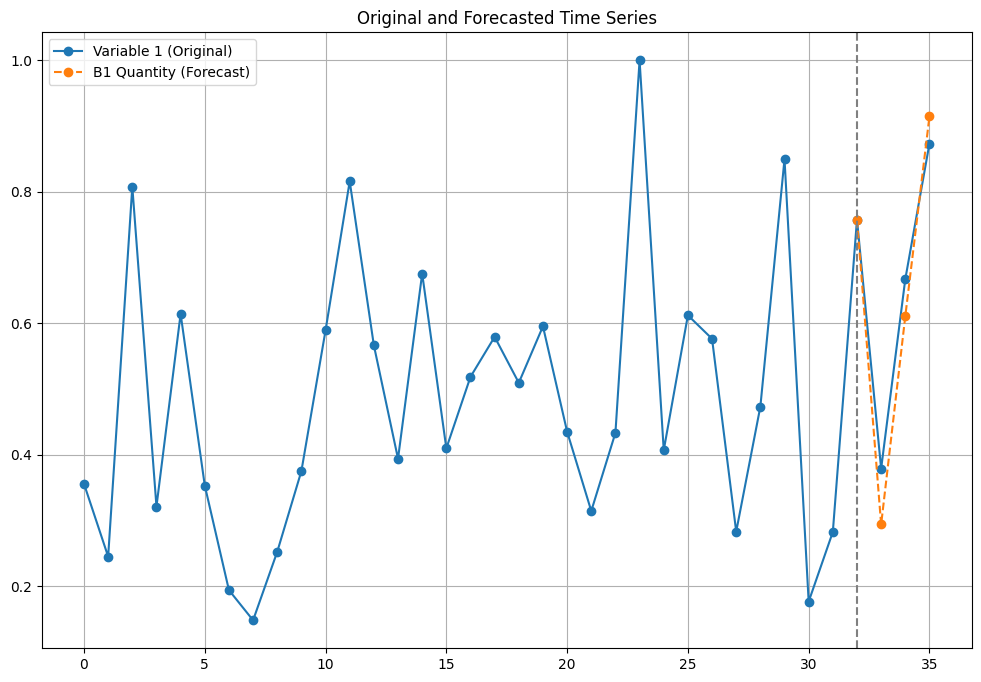

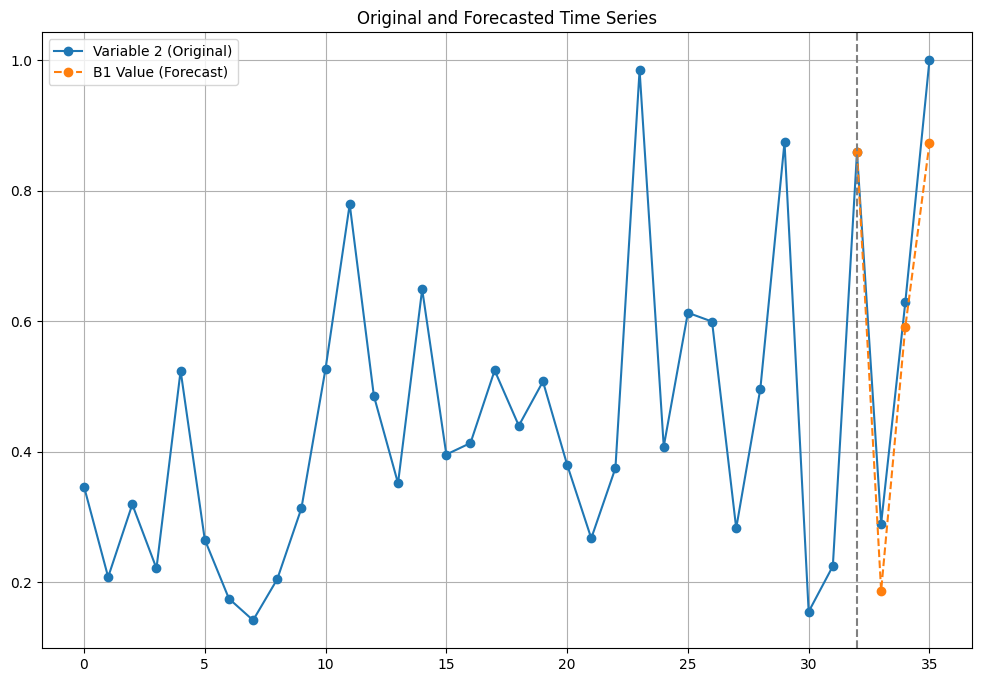

Kết quả mô hình VAR cho dữ liệu gốc, kết quả lần lượt dự báo sản lượng, doanh thu công ty, sản lượng, doanh thu đối thủ
---------------------------------------------------
Root Mean Squared Error : 0.22598287943845663
Mean Absolute Error : 0.20384880465439026
Mean Absolute Percentage Error : 34.8372056253092%
---------------------------------------------------

---------------------------------------------------
Root Mean Squared Error : 0.29398680679380684
Mean Absolute Error : 0.23442031259828436
Mean Absolute Percentage Error : 40.88488725695225%
---------------------------------------------------

---------------------------------------------------
Root Mean Squared Error : 0.37971874730386507
Mean Absolute Error : 0.30887055798608104
Mean Absolute Percentage Error : 63.856935586443285%
---------------------------------------------------



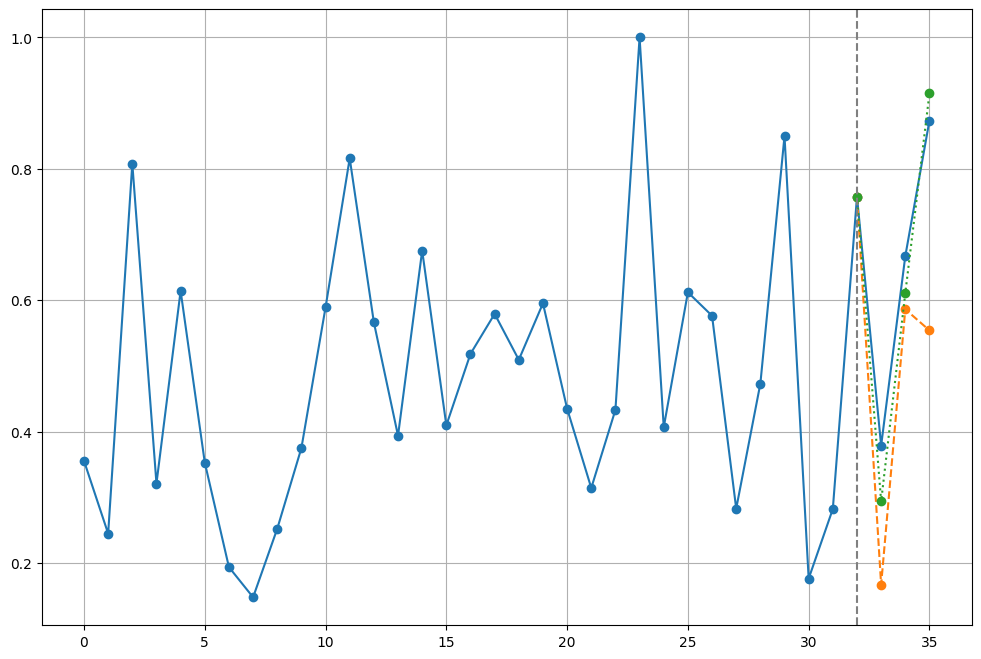

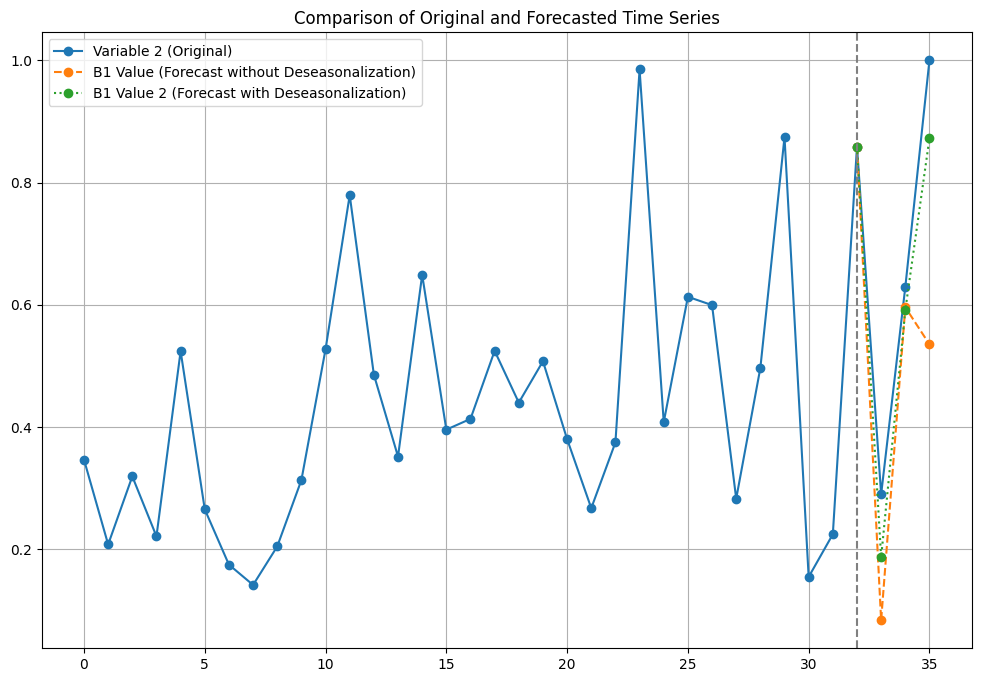

In [8]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Evaluate the performance using metrics like MSE, MAE, and Percentage Error
# def print_metrics(true_values, forecast_values):
#     mse = np.sqrt(np.mean((true_values - forecast_values) ** 2))
#     mae = np.mean(np.abs(true_values - forecast_values))
#     percentage_error = np.mean(np.abs((true_values - forecast_values) / true_values)) * 100
#     return mse, mae, percentage_error

def forecast_var(var_series1, var_series2, var_series3, forecast_steps=4,Maxflag=1,Period=3):
    # var1 = var_series1
    # var2 = var_series2
    # var3 = var_series3
    # var4 = var_series4
    
    var1 = var_series1.flatten()/ np.max(var_series1)
    var2 = var_series2.flatten()/ np.max(var_series2)
    var3 = var_series3.flatten() / np.max(var_series3)
    # var4 = var_series4.flatten() / np.max(var_series4)
    t = np.arange(0, len(var_series3), 1)
    
    # Step 1: Decompose the time series into trend, seasonal, and residual components
    res_var1 = sm.tsa.seasonal_decompose(var1, period=Period)
    res_var2 = sm.tsa.seasonal_decompose(var2, period=Period)
    res_var3 = sm.tsa.seasonal_decompose(var3, period=Period)
    # res_var4 = sm.tsa.seasonal_decompose(var4, period=Period)
    
    
    
    # Deseasonalized data
    deseasonalized_var1 = var1 - res_var1.seasonal
    deseasonalized_var2 = var2 - res_var2.seasonal
    deseasonalized_var3 = var3 - res_var3.seasonal
    # deseasonalized_var4 = var4 - res_var4.seasonal

    # Combine deseasonalized variables into a 2D array
    data_deseasonalized = np.column_stack((deseasonalized_var1, deseasonalized_var2, deseasonalized_var3))

    # Step 2: Apply VAR to the deseasonalized data
    model = sm.tsa.VAR(data_deseasonalized)
    results = model.fit(maxlags=Maxflag)  # Adjust maxlags as needed

    # Step 3: Forecast using VAR model
#     forecast_steps = 4
    forecast_deseasonalized = results.forecast(data_deseasonalized[-results.k_ar:], steps=forecast_steps)

    # Step 4: Add seasonality back to the forecast
    forecast_var1 = forecast_deseasonalized[:, 0] + res_var1.seasonal[-forecast_steps:]
    forecast_var2 = forecast_deseasonalized[:, 1] + res_var2.seasonal[-forecast_steps:]
    forecast_var3 = forecast_deseasonalized[:, 2] + res_var3.seasonal[-forecast_steps:]
    # forecast_var4 = forecast_deseasonalized[:, 3] + res_var4.seasonal[-forecast_steps:]
    print("Kết quả mô hình VAR đã tách mùa, kết quả lần lượt dự báo sản lượng, doanh thu công ty, sản lượng, doanh thu đối thủ")
    print('dự báo sản lượng')
    print_metrics(var1[-forecast_steps:], forecast_var1)
    print('Dự báo doanh thu')
    print_metrics(var2[-forecast_steps:], forecast_var2)
    # print_metrics(var3[-forecast_steps:], forecast_var3)
    # print_metrics(var4[-forecast_steps:], forecast_var4)

    # Plot the original and forecasted time series for all variables
    plt.figure(figsize=(12, 8))
    plt.plot(t, var1, label='Variable 1 (Original)',marker='o')
    plt.plot(t[-forecast_steps-1:], np.append(var1[-forecast_steps-1], forecast_var1), label='B1 Quantity (Forecast)', linestyle='dashed',marker='o')
    plt.axvline(x=len(var1) - forecast_steps - 1, color='grey', linestyle='--')
    plt.title('Original and Forecasted Time Series')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    plt.figure(figsize=(12, 8))
    plt.plot(t, var2, label='Variable 2 (Original)',marker='o')
    #plt.plot(t, var3, label='Variable 3 (Original)')
    #plt.plot(t, var4, label='Variable 4 (Original)')
    plt.plot(t[-forecast_steps-1:], np.append(var2[-forecast_steps-1], forecast_var2), label='B1 Value (Forecast)', linestyle='dashed',marker='o')
    #plt.plot(t[-forecast_steps-1:], np.append(var3[-forecast_steps-1], forecast_var3), label='Variable 3 (Forecast)', linestyle='dashed',marker='o')
    #plt.plot(t[-forecast_steps-1:], np.append(var4[-forecast_steps-1], forecast_var4), label='Variable 4 (Forecast)', linestyle='dashed',marker='o')
    plt.axvline(x=len(var1) - forecast_steps - 1, color='grey', linestyle='--')
    plt.title('Original and Forecasted Time Series')
    plt.legend()
    plt.grid(True)
    plt.show()


    data = np.column_stack((var1, var2, var3))
    # Step 2: Apply VAR to the original data (without deseasonalization)
    model_original = sm.tsa.VAR(data)
    results_original = model_original.fit(maxlags=Maxflag)  # Adjust maxlags as needed

    # Step 3: Forecast using VAR model (original data)
    forecast_original = results_original.forecast(data[-results_original.k_ar:], steps=forecast_steps)

    # Evaluate metrics for the original data
    print("Kết quả mô hình VAR cho dữ liệu gốc, kết quả lần lượt dự báo sản lượng, doanh thu công ty, sản lượng, doanh thu đối thủ")
    print_metrics(var1[-forecast_steps:], forecast_original[:, 0])
    print_metrics(var2[-forecast_steps:], forecast_original[:, 1])
    print_metrics(var3[-forecast_steps:], forecast_original[:, 2])
    # print_metrics(var4[-forecast_steps:], forecast_original[:, 3])


    # Plot the original and forecasted time series for comparison
    plt.figure(figsize=(12, 8))
    plt.plot(t, var1, label='Variable 1 (Original)',marker='o')
    plt.plot(t[-forecast_steps-1:], np.append(var1[-forecast_steps-1], forecast_original[:, 0]), linestyle='dashed', label='B1 Quantity (Forecast without Deseasonalization)',marker='o')
    plt.plot(t[-forecast_steps-1:], np.append(var1[-forecast_steps-1], forecast_var1), linestyle='dotted', label='B1 Quantity (Forecast with Deseasonalization)',marker='o')
    plt.axvline(x=len(var1) - forecast_steps - 1, color='grey', linestyle='--')
    plt.grid(True)
    plt.show()
    #plt.plot(t, var3, label='Variable 3 (Original)')
    #plt.plot(t, var4, label='Variable 4 (Original)')

    plt.figure(figsize=(12, 8))
    plt.plot(t, var2, label='Variable 2 (Original)',marker='o')
    plt.plot(t[-forecast_steps-1:], np.append(var2[-forecast_steps-1], forecast_original[:, 1]), linestyle='dashed', label='B1 Value (Forecast without Deseasonalization)',marker='o')
    plt.plot(t[-forecast_steps-1:], np.append(var2[-forecast_steps-1], forecast_var2), linestyle='dotted', label='B1 Value 2 (Forecast with Deseasonalization)',marker='o')
    plt.axvline(x=len(var1) - forecast_steps - 1, color='grey', linestyle='--')
    #plt.plot(t[-forecast_steps-1:], np.append(var3[-forecast_steps-1], forecast_original[:, 2]), linestyle='dashed', label='Variable 3 (Forecast without Deseasonalization)',marker='o')
    #plt.plot(t[-forecast_steps-1:], np.append(var4[-forecast_steps-1], forecast_original[:, 3]), linestyle='dashed', label='Variable 4 (Forecast without Deseasonalization)',marker='o')

    #plt.plot(t[-forecast_steps-1:], np.append(var3[-forecast_steps-1], forecast_var3), linestyle='dotted', label='Variable 3 (Forecast with Deseasonalization)',marker='o')
    #plt.plot(t[-forecast_steps-1:], np.append(var4[-forecast_steps-1], forecast_var4), linestyle='dotted', label='Variable 4 (Forecast with Deseasonalization)',marker='o')

    plt.title('Comparison of Original and Forecasted Time Series')
    plt.legend()
    plt.grid(True)
    plt.show()

forecast_var(series1[:], series2[:], series3[:],  forecast_steps=3,Maxflag=2,Period=12)

In [20]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose

# Hàm tính toán các độ đo
def calculate_metrics(true_values, forecast_values):
    mse = np.mean((true_values - forecast_values) ** 2)  # Mean Squared Error
    mae = np.mean(np.abs(true_values - forecast_values))  # Mean Absolute Error
    rmse = np.sqrt(mse) 
    mape = np.mean(np.abs((true_values - forecast_values) / true_values)) * 100  # Mean Absolute Percentage Error
    return mse, mae, rmse, mape

def print_metrics(true_values, forecast_values):
    mse, mae, rmse, mape = calculate_metrics(true_values, forecast_values)
    print(f'MSE: {np.round(mse)}, MAE: {np.round(mae)}, RMSE: {np.round(rmse)}, MAPE: {np.round(mape, 5)}%')

def forecast_var(data, forecast_steps ,max_lag ,Period):
    # Tách mùa cho từng chuỗi dữ liệu
    seasonal_decomposed = {}
    for column in data.columns:
        decomposition = seasonal_decompose(data[column], model='additive', period=Period)
        seasonal_decomposed[column] = decomposition.seasonal

    # Trừ phần mùa khỏi dữ liệu gốc để chỉ còn lại phần xu hướng và ngẫu nhiên
    deseasonalized_data = data - pd.DataFrame(seasonal_decomposed)

    # Chia tập train và tập test
    train_size = int(len(deseasonalized_data) * 2/3)  # Sử dụng 80% dữ liệu làm tập train
    
    train, test = deseasonalized_data.iloc[:train_size], deseasonalized_data.iloc[train_size:]
    # print(test)

    # Chuẩn hoá dữ liệu bằng Min-Max scaler chỉ trên tập huấn luyện
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train)
    train_scaled_df = pd.DataFrame(train_scaled, columns=data.columns, index=train.index)
    test_scaled = scaler.transform(test)
    test_scaled_df = pd.DataFrame(test_scaled, columns=data.columns, index=test.index)

    # # Áp dụng sai phân
    # train_diff_df = train_scaled_df.diff().dropna()
    # test_diff_df = test_scaled_df.diff().dropna()

    # Xây dựng mô hình VAR trên tập train
    model = VAR(train_scaled_df)

    # Tìm ra số lượng lag tốt nhất
    # best_lag = model.select_order()
    # best_lag = best_lag.selected_orders['aic']

    # Fit mô hình với số lượng lag tốt nhất trên tập train
    result = model.fit(max_lag)

    # Dự báo trên tập test
    forecast = result.forecast(train_scaled_df.values[-max_lag:], steps=len(test_scaled_df))

    # Chuyển kết quả dự báo về dạng DataFrame
    forecast_df = pd.DataFrame(forecast, columns=data.columns, index=test_scaled_df.index)

    # Đảo ngược quá trình sai phân để có kết quả dự báo thực tế
    
    forecast_df = pd.DataFrame(scaler.inverse_transform(forecast_df), columns=data.columns, index=test_scaled_df.index)

    # Thêm lại phần mùa vào kết quả dự báo
    seasonal_forecast = pd.DataFrame(seasonal_decomposed).iloc[train_size:]
    # print(seasonal_forecast.values)
    # print(forecast_df)
    forecast_df += seasonal_forecast.values

    # Cắt bỏ hàng cuối của tập test để phù hợp với độ dài của forecast_df
    test = data[-forecast_steps:]
    test_values = test.iloc[:, 0]
    forecast = forecast_df[-forecast_steps:]
    forecast_values = forecast.iloc[:, 0]
    print(forecast_values)
    print(test_values)

    # Tính toán và in ra các độ đo
    print_metrics(test_values, forecast_values.values)
# data = pd.read_csv('DL_TongHop.csv')  # Thay 'du_lieu.csv' bằng tên file của bạn
# # data = pd.read_excel('DL_Tonghop.xlsx')  # Thay 'du_lieu.csv' bằng tên file của bạn
# data.set_index('Thang', inplace=True)

# print("Trường hợp Var(1)")
# data1 = data[['SoLuong', 'TienKM']]
# forecast_var(data1, forecast_steps = 6 ,max_lag = 1,Period = 12)

# print("Trường hợp Var(2)")
# forecast_var(data1, forecast_steps = 6 ,max_lag = 2,Period = 12)

# print("Trường hợp Var(3)")
# forecast_var(data1, forecast_steps = 6 ,max_lag = 3,Period = 12)

# print("Trường hợp Var(4)")
# forecast_var(data1, forecast_steps = 6 ,max_lag = 4,Period = 12)

In [21]:
data = pd.read_csv('DL_TongHop.csv')  # Thay 'du_lieu.csv' bằng tên file của bạn
# data = pd.read_excel('DL_Tonghop.xlsx')  # Thay 'du_lieu.csv' bằng tên file của bạn
data.set_index('Thang', inplace=True)

# print("Trường hợp Var(1)")
data1 = data[['SoLuong','TienKM']]

# forecast_var(data1, forecast_steps = 12 ,max_lag = 1,Period = 12)

# print("Trường hợp Var(2)")
# forecast_var(data1, forecast_steps = 12 ,max_lag = 2,Period = 12)

# print("Trường hợp Var(3)")
# forecast_var(data1, forecast_steps = 12 ,max_lag = 3,Period = 12)

print("Trường hợp Var(4)")
forecast_var(data1, forecast_steps = 12 ,max_lag = 1,Period = 12)

Trường hợp Var(4)
Thang
2023-01    335180.847129
2023-02    362747.601004
2023-03    443982.324329
2023-04    245016.831940
2023-05    352464.201753
2023-06    508334.251017
2023-07    276792.612393
2023-08    273820.991752
2023-09    274974.088204
2023-10    299423.561611
2023-11    422526.172949
2023-12    720805.736881
Name: SoLuong, dtype: float64
Thang
2023-01    284237
2023-02    427779
2023-03    402828
2023-04    197745
2023-05    330644
2023-06    593879
2023-07    123324
2023-08    197368
2023-09    529520
2023-10    264714
2023-11    466186
2023-12    610415
Name: SoLuong, dtype: int64
MSE: 10669586109.0, MAE: 82083.0, RMSE: 103294.0, MAPE: 28.33861%


c:\Users\User\anaconda3\envs\tensorFlow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


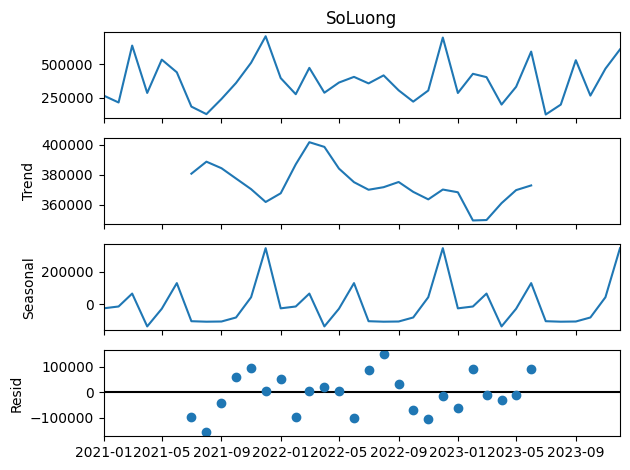

In [ ]:
from random import randrange
from pandas import Series
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
data = pd.read_csv('DL_TongHop.csv')  # Thay 'du_lieu.csv' bằng tên file của bạn
# Chuyển đổi cột 'Thang' thành định dạng datetime và thiết lập làm chỉ số
data['Thang'] = pd.to_datetime(data['Thang'])
data.set_index('Thang', inplace=True)

# Thiết lập tần suất cho chỉ số thời gian
data = data.asfreq('MS')  # Giả định rằng dữ liệu là hàng tháng (Month Start)

# Thực hiện phân tích chuỗi thời gian
result = seasonal_decompose(data['SoLuong'], model='additive')

# Vẽ đồ thị các thành phần
result.plot()
plt.show()